# MSA 2023 Phase 2 - Part 1 Regression

In [212]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## 1. Find all variables and understand them

### 1.1 Load Data and show first 10 instances

In [213]:
#read file
data_set = pd.read_csv('./data/data_salaries.csv')
data_set.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


### 1.2 Overview data

#### 1.2.1 Get mean and std

In [214]:
#get mean and std for numerical variable
data_set.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


#### 1.2.2 Get number of null values

In [215]:
#null values
number_of_null = data_set.isna().sum()
print(number_of_null)
print()
percentage_of_complete = (1 - number_of_null / len(data_set))* 100
print(percentage_of_complete)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

work_year             100.0
experience_level      100.0
employment_type       100.0
job_title             100.0
salary                100.0
salary_currency       100.0
salary_in_usd         100.0
employee_residence    100.0
remote_ratio          100.0
company_location      100.0
company_size          100.0
dtype: float64


#### 1.2.3 Get data types

In [216]:
#datatypes of each col adn identify the numeric and non-numeric attributes
datatypes = data_set.dtypes 
print('Datatype', datatypes)

Datatype work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


#### 1.2.4 number of cloumns

In [217]:
#preview of the data
columns = len(data_set.columns)
number = sum(data_set.count())
instances_of_each_column = data_set.count()
print('number of columns: ', columns)
print('total number of instances: ', number)
print('instances in each column: ', instances_of_each_column)

number of columns:  11
total number of instances:  41305
instances in each column:  work_year             3755
experience_level      3755
employment_type       3755
job_title             3755
salary                3755
salary_currency       3755
salary_in_usd         3755
employee_residence    3755
remote_ratio          3755
company_location      3755
company_size          3755
dtype: int64


#### 1.2.5 Unique value in each col

In [218]:
print(data_set.nunique())

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


### 1.3 Visualize numeric data

In [219]:
numeric_list = ['work_year', 'salary', 'remote_ratio', 'salary_in_usd']

### 1.3.1 Overall view of numeric data

Class Counts:
work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

Class Proportions:
work_year
2023    0.475366
2022    0.443142
2021    0.061252
2020    0.020240
Name: count, dtype: float64


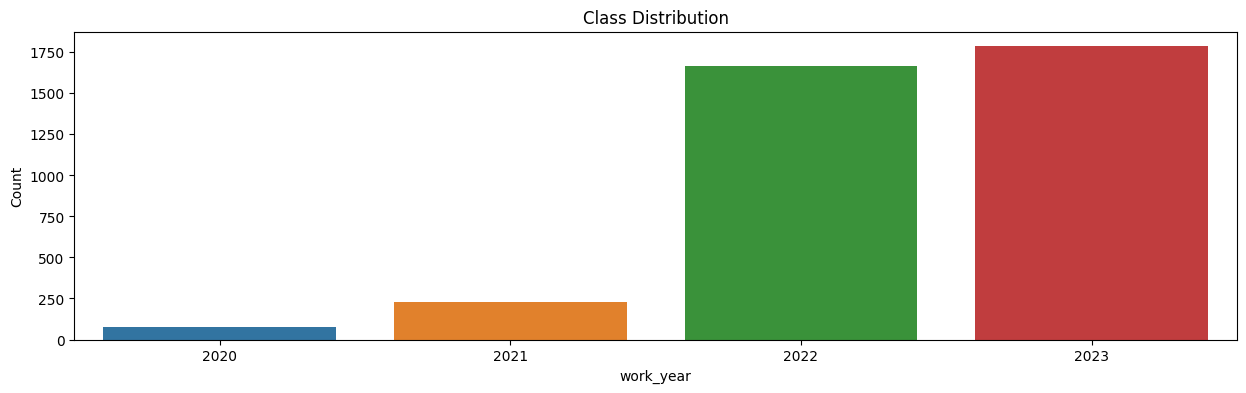

Class Counts:
salary
100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: count, Length: 815, dtype: int64

Class Proportions:
salary
100000    0.029827
150000    0.026631
120000    0.026365
160000    0.022636
130000    0.022636
            ...   
241871    0.000266
93919     0.000266
385000    0.000266
225900    0.000266
412000    0.000266
Name: count, Length: 815, dtype: float64


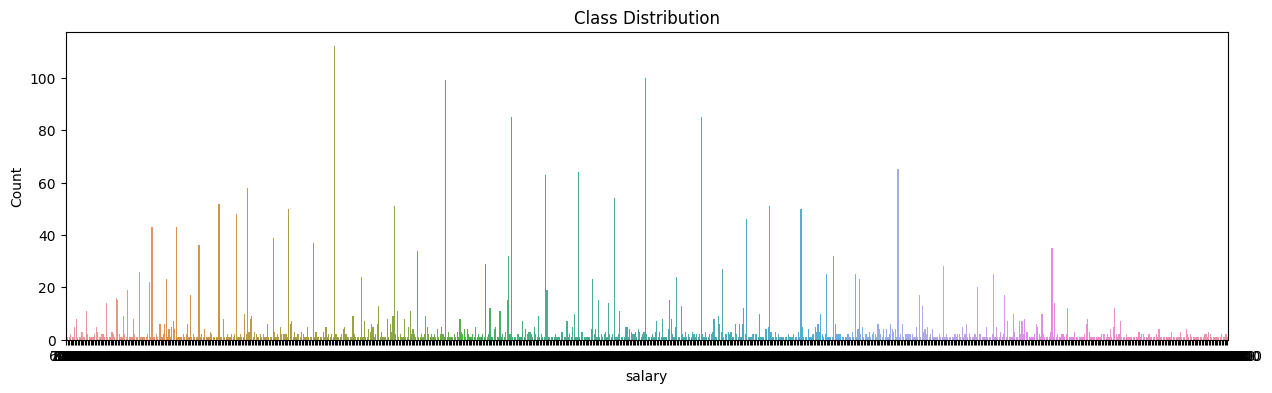

Class Counts:
remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

Class Proportions:
remote_ratio
0      0.512117
100    0.437550
50     0.050333
Name: count, dtype: float64


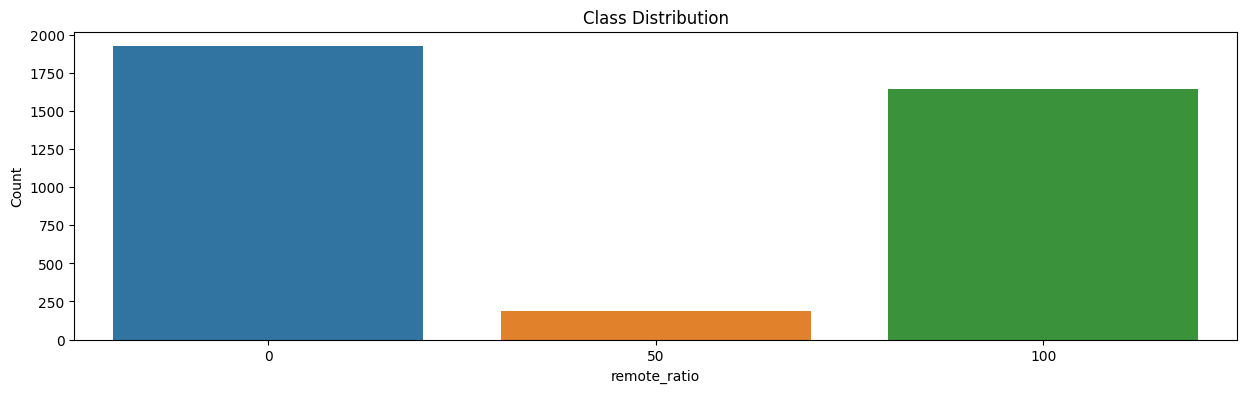

Class Counts:
salary_in_usd
100000    99
150000    98
120000    91
160000    84
130000    82
          ..
234100     1
223800     1
172100     1
232200     1
94665      1
Name: count, Length: 1035, dtype: int64

Class Proportions:
salary_in_usd
100000    0.026365
150000    0.026099
120000    0.024234
160000    0.022370
130000    0.021838
            ...   
234100    0.000266
223800    0.000266
172100    0.000266
232200    0.000266
94665     0.000266
Name: count, Length: 1035, dtype: float64


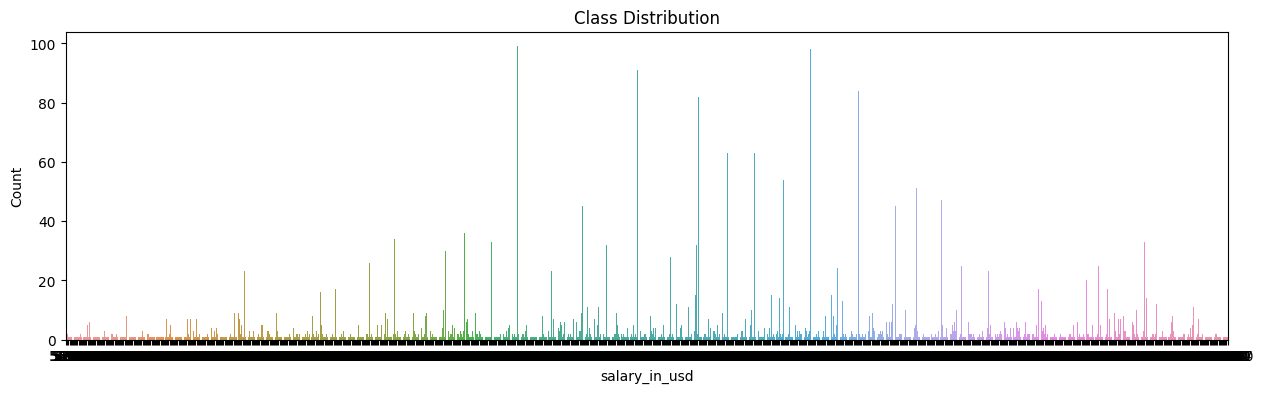

In [220]:
#plot numerical columns bar
#columns_list =  ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

for col_namne in numeric_list:
    class_counts = data_set[col_namne].value_counts()

# calculate the proportion
    class_proportions = class_counts / class_counts.sum()

# print distribution
    print("Class Counts:")
    print(class_counts)
    print("\nClass Proportions:")
    print(class_proportions)

# draw the distribution
    plt.figure(figsize=(15, 4))
    sns.countplot(data=data_set, x=col_namne)
    plt.title("Class Distribution")
    plt.xlabel(f"{col_namne}")
    plt.ylabel("Count")
    plt.show()

Minimum:2020.00
Mean:2022.37
Median:2022.00
Mode:2023.00
Maximum:2023.00



C:\Users\Tao\AppData\Local\Temp\ipykernel_4664\3447469613.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Tao\AppData\Local\Temp\ipykernel_4664\3447469613.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Tao\AppData\Local\Temp\ipykernel_4664\3447469613.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Tao\AppData\Local\Temp\ipykernel_4664\3447469613.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Minimum:6000.00
Mean:190695.57
Median:138000.00
Mode:100000.00
Maximum:30400000.00

Minimum:0.00
Mean:46.27
Median:0.00
Mode:0.00
Maximum:100.00

Minimum:5132.00
Mean:137570.39
Median:135000.00
Mode:100000.00
Maximum:450000.00



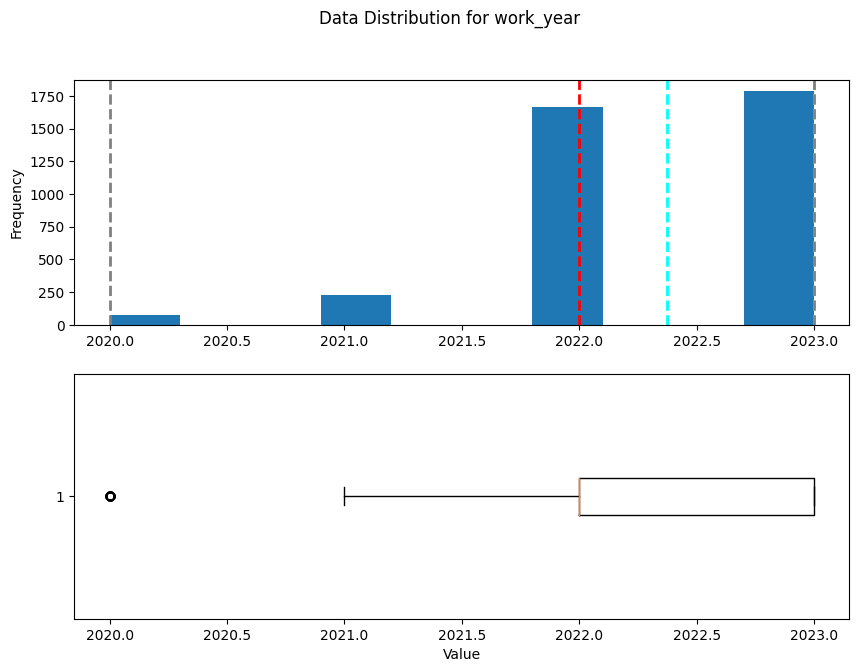

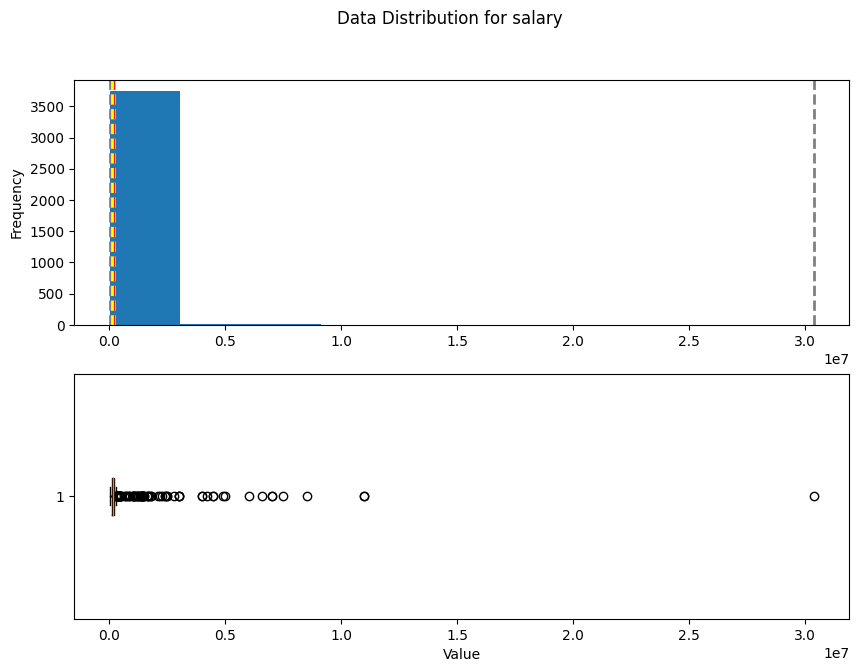

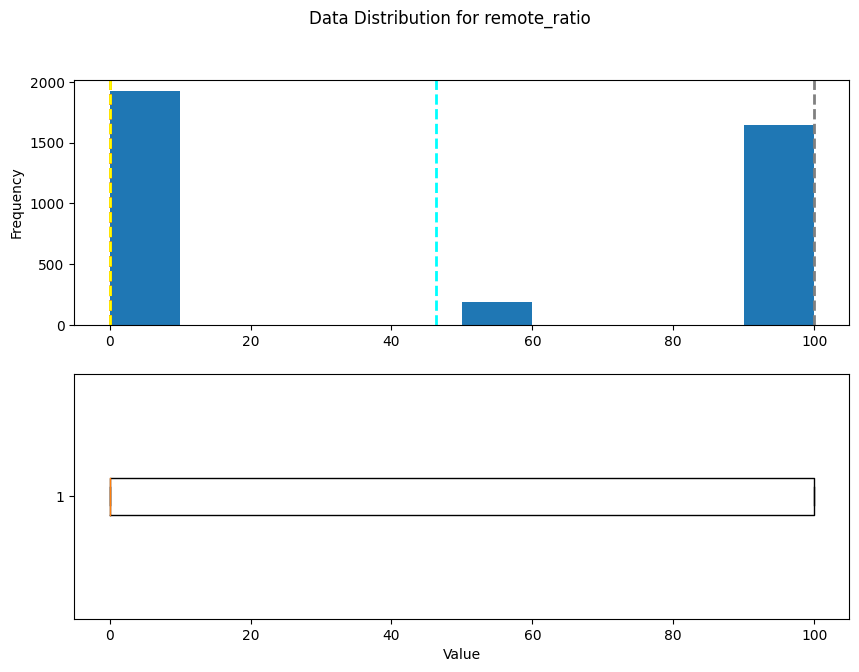

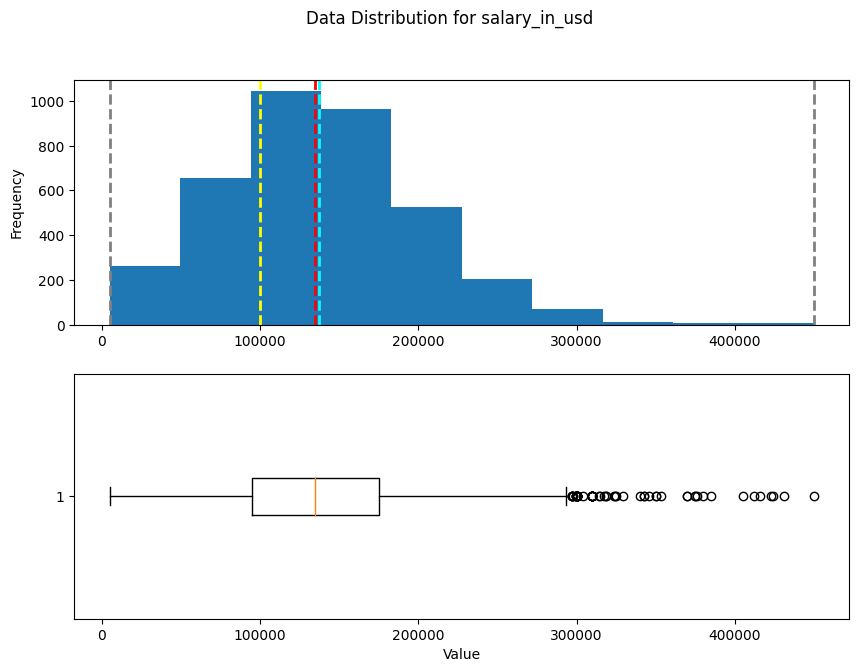

In [221]:
# Create a function that we can re-use
def show_distribution(var_data,col):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,7))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Data Distribution for {col}')

    # Show the figure
    fig.show()

# Get the variable to examine

#columns_list =  ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
for col_namne in numeric_list:
    col = data_set[col_namne]
    # Call the function
    show_distribution(col,col_namne)


#### 1.3.2 salary distribution with work year and remote ratio

Text(0.5, 1.0, 'salary/work_year distribution')

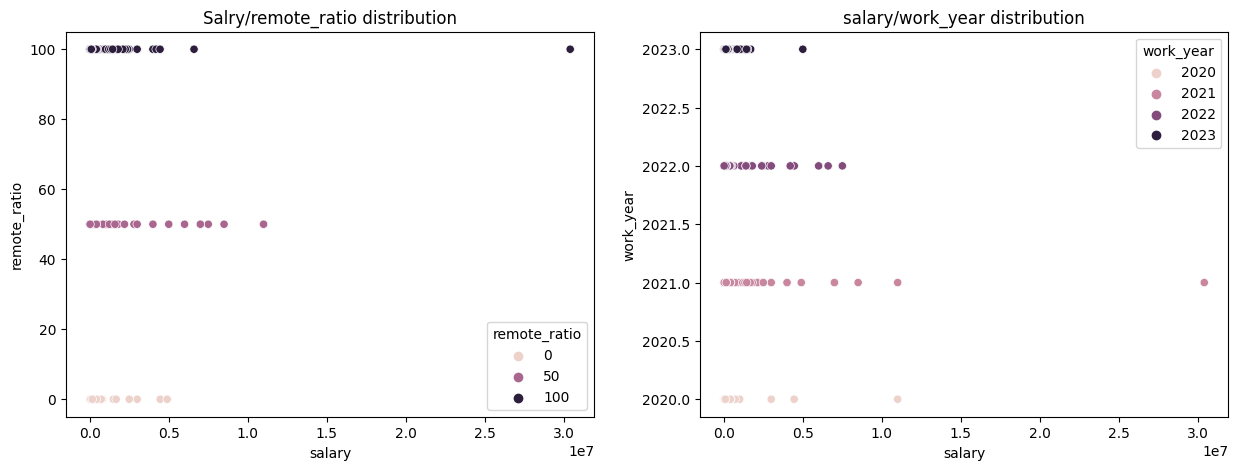

In [222]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.scatterplot(data = data_set, x='salary', y='remote_ratio', hue='remote_ratio', ax=ax[0]).set_title("Salry/remote_ratio distribution")
sns.scatterplot(data = data_set, x='salary', y='work_year', hue='work_year', ax=ax[1]).set_title("salary/work_year distribution")



#### 1.3.3 salary_in_usd distribution with work_year and remote_ratio

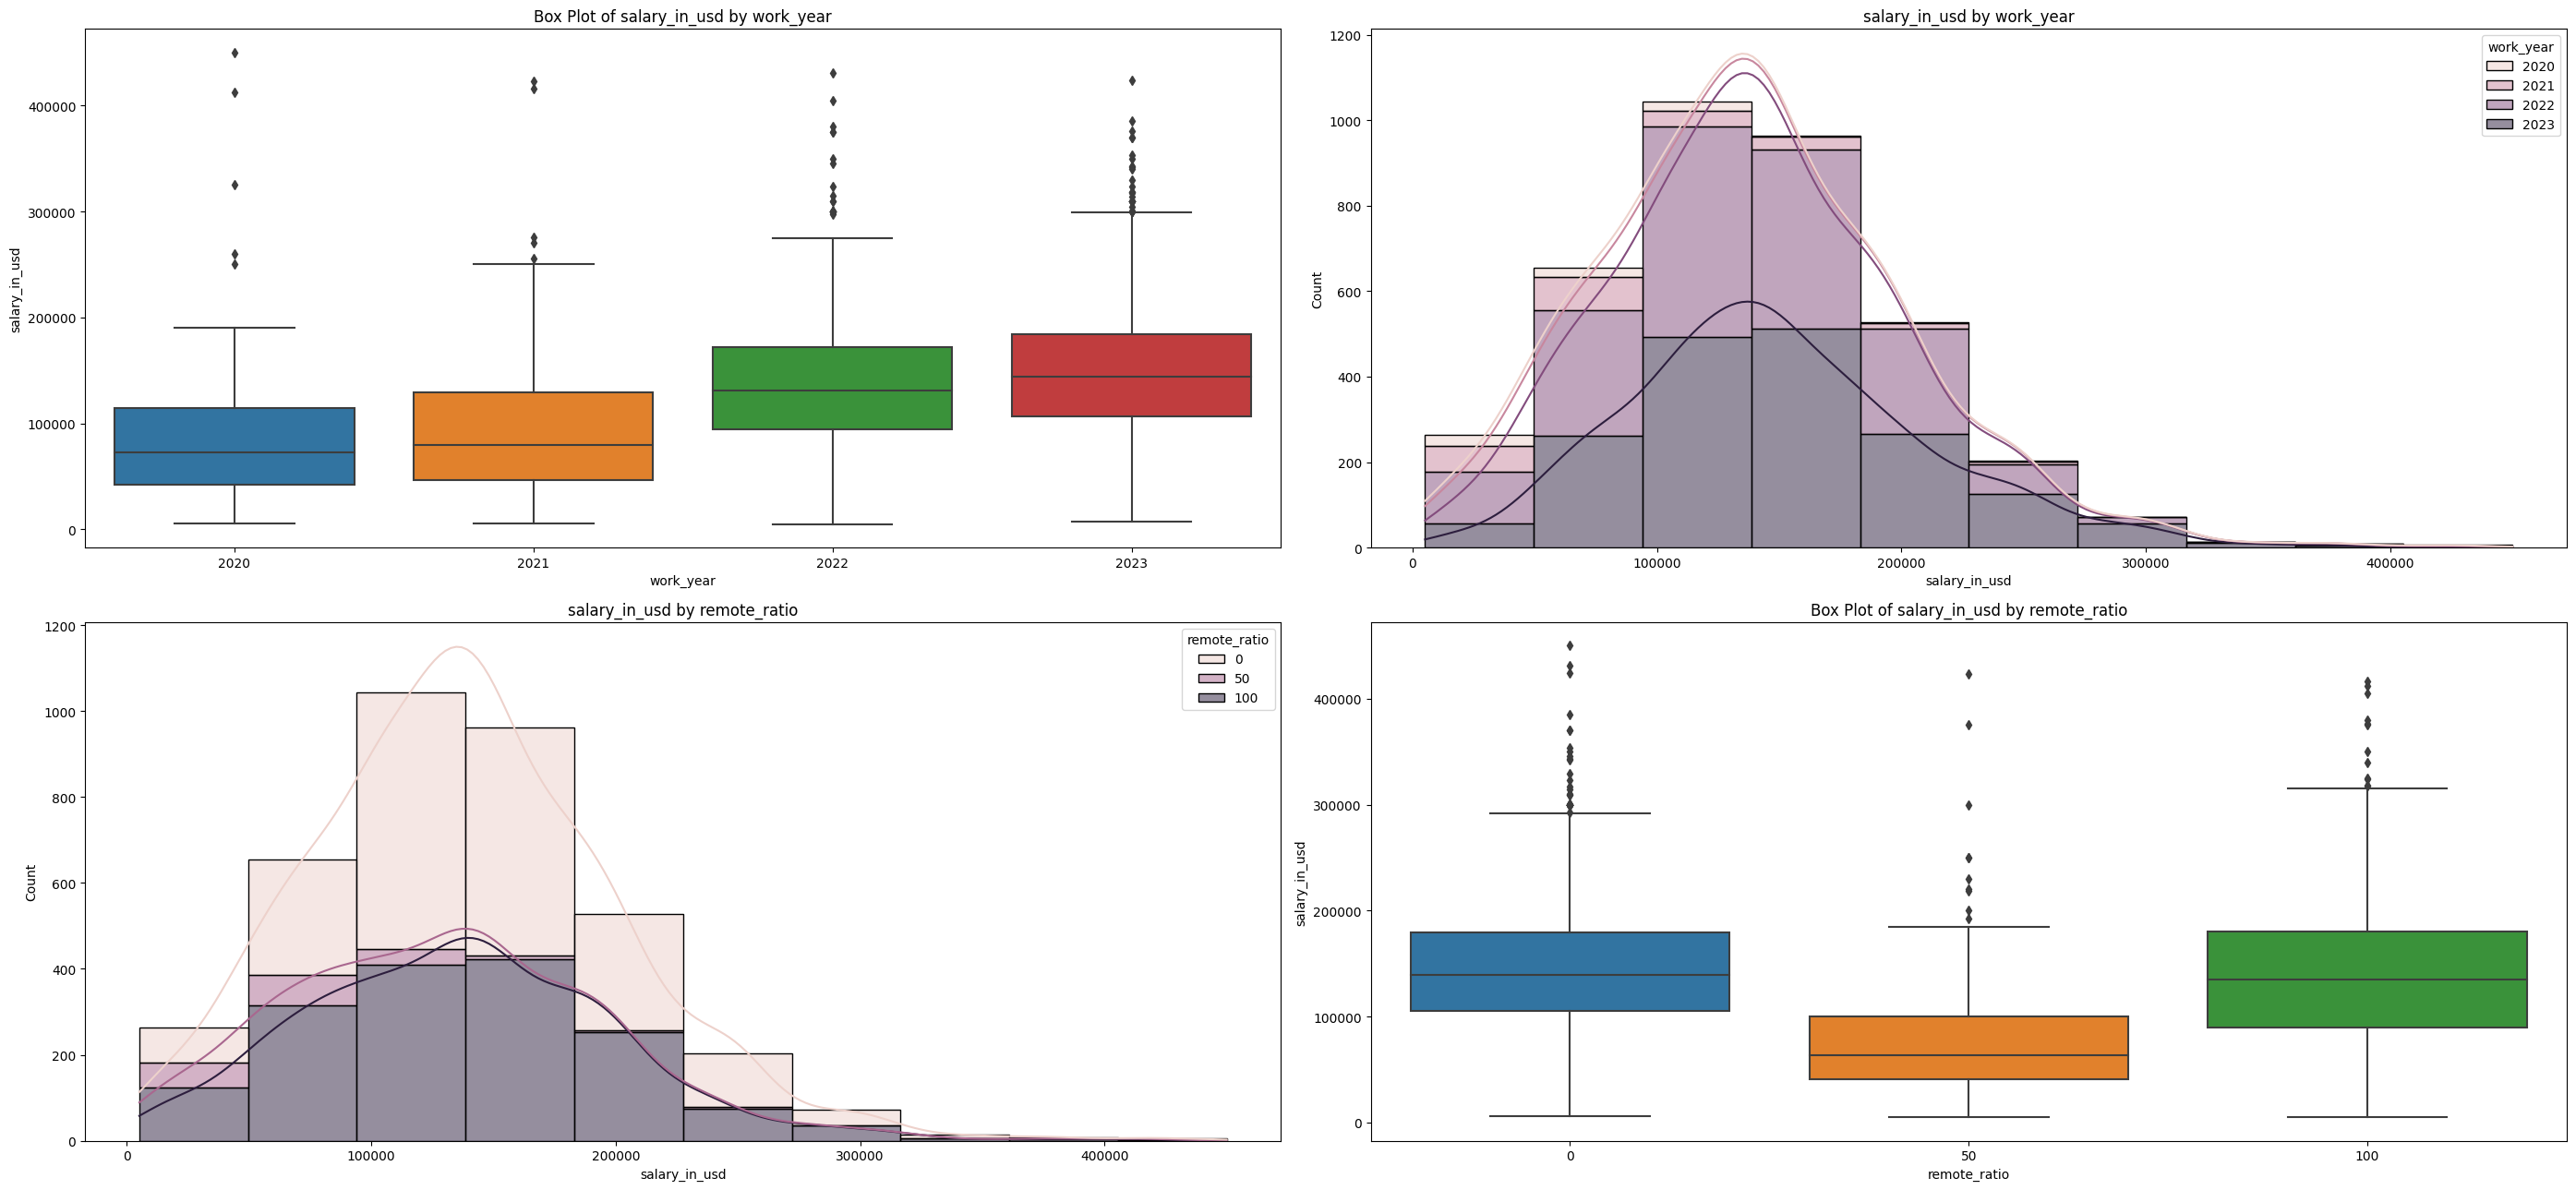

In [223]:
#numeric_list = ['work_year', 'salary', 'remote_ratio', 'salary_in_usd']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (28, 13))


sns.boxplot(data = data_set, x = 'work_year', y = 'salary_in_usd', ax = axes[0, 0])
axes[0, 0].set_title("Box Plot of salary_in_usd by work_year")

sns.histplot(data = data_set, x='salary_in_usd',  hue='remote_ratio',multiple='stack', bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("salary_in_usd by remote_ratio")

# sns.pointplot(data=data_set, x='work_year', y='salary', ci='sd', capsize=0.2, ax=axes[0, 1])
# axes[0, 1].set_title("duration by class")


sns.histplot(data = data_set, x='salary_in_usd',  hue='work_year',multiple='stack', bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("salary_in_usd by work_year")

sns.boxplot(data=data_set, x='remote_ratio', y='salary_in_usd', ax=axes[1, 1])
axes[1, 1].set_title("Box Plot of salary_in_usd by remote_ratio")

# sns.scatterplot(data = data_set, x='salary_in_usd', y='work_year', hue='remote_ratio', ax=axes[1, 1])
# axes[1, 1].set_title("Age by class")



# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [224]:
column_list = data_set.columns
print(column_list)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


### 1.4 Convert Data Type


In [225]:
import copy

In [226]:
ds = copy.deepcopy(data_set)
dsSVM = copy.deepcopy(data_set)

### 1.4.1 Doing Ordinal encoder for attributes has some sort of order, and doing one-hot encoder for categories order does not matter (SVM may sensitive to the order)

In [227]:
# Covert data type:
#ordinal converting
company_size_order = ["S","M","L"]
dsSVM["company_size"] =  pd.Categorical(dsSVM["company_size"],categories=company_size_order,ordered=True)
dsSVM["company_size"] = dsSVM["company_size"].cat.codes

experience_level_order = ["EN","EX","MI","SE"]
dsSVM["experience_level"] =  pd.Categorical(dsSVM["experience_level"],categories=experience_level_order,ordered=True)
dsSVM["experience_level"] = dsSVM["experience_level"].cat.codes

empolyment_type_order = ["PT","FL","CT","FT"]
dsSVM["employment_type"] =  pd.Categorical(dsSVM["employment_type"],categories=empolyment_type_order,ordered=True)
dsSVM["employment_type"] = dsSVM["employment_type"].cat.codes

#one-hot encoder
dsSVM= pd.get_dummies(dsSVM, columns=["job_title","salary_currency","employee_residence","company_location"])
dsSVM = dsSVM.astype(int)


In [228]:
dsSVM.dtypes

work_year              int32
experience_level       int32
employment_type        int32
salary                 int32
salary_in_usd          int32
                       ...  
company_location_TH    int32
company_location_TR    int32
company_location_UA    int32
company_location_US    int32
company_location_VN    int32
Length: 270, dtype: object

In [229]:
print(dsSVM.nunique())

work_year                 4
experience_level          4
employment_type           4
salary                  815
salary_in_usd          1035
                       ... 
company_location_TH       2
company_location_TR       2
company_location_UA       2
company_location_US       2
company_location_VN       2
Length: 270, dtype: int64


### 1.4.2 Tree algorithm (who dont care orders)

In [230]:

company_size_order = ["S","M","L"]
ds["company_size"] =  pd.Categorical(ds["company_size"],categories=company_size_order,ordered=True)
ds["company_size"] = ds["company_size"].cat.codes

experience_level_order = ["EN","EX","MI","SE"]
ds["experience_level"] =  pd.Categorical(ds["experience_level"],categories=experience_level_order,ordered=True)
ds["experience_level"] = ds["experience_level"].cat.codes

empolyment_type_order = ["PT","FL","CT","FT"]
ds["employment_type"] =  pd.Categorical(ds["employment_type"],categories=empolyment_type_order,ordered=True)
ds["employment_type"] = ds["employment_type"].cat.codes

ds["employment_type"]

job_title_lb = LabelEncoder()
job_title_lb.fit(ds["job_title"])

ds["job_title"] = job_title_lb.transform(ds["job_title"])

employee_residence_lb = LabelEncoder()
employee_residence_lb.fit(ds["employee_residence"])

ds["employee_residence"] = employee_residence_lb.transform(ds["employee_residence"])

company_location_lb = LabelEncoder()
company_location_lb.fit(ds["company_location"])

ds["company_location"] = company_location_lb.transform(ds["company_location"])

company_location_lb = LabelEncoder()
company_location_lb.fit(ds["salary_currency"])

ds["salary_currency"] = company_location_lb.transform(ds["salary_currency"])

In [231]:
print(ds.nunique())

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


In [232]:
ds.dtypes

work_year             int64
experience_level       int8
employment_type        int8
job_title             int32
salary                int64
salary_currency       int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size           int8
dtype: object

## 2.Visualize Data

### 2.1 Visualize dsSVM data 

In [233]:
job_patter = re.compile("^job_title_")
job_title_col = dsSVM.filter(regex=job_patter).columns

salary_currency_patter = re.compile("^salary_currency_")
salary_currency_col = dsSVM.filter(regex=salary_currency_patter).columns


employee_residence_patter = re.compile("^employee_residence_")
employee_residence_col = dsSVM.filter(regex=employee_residence_patter).columns


company_location_patter = re.compile("^company_location_")
company_location_col = dsSVM.filter(regex=company_location_patter).columns

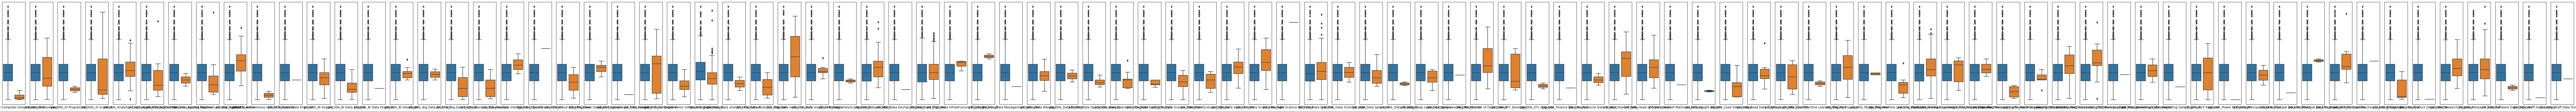

In [234]:
fig,axs = plt.subplots(1,len(job_title_col),figsize=(150,6))

for i,col_name in enumerate(job_title_col):
    sns.boxplot(x=col_name,y="salary_in_usd",data=dsSVM,ax=axs[i])
    axs[i].set_xticks([]) 
    axs[i].set_yticks([])  
    axs[i].set_ylabel('') 

plt.tight_layout
plt.show()

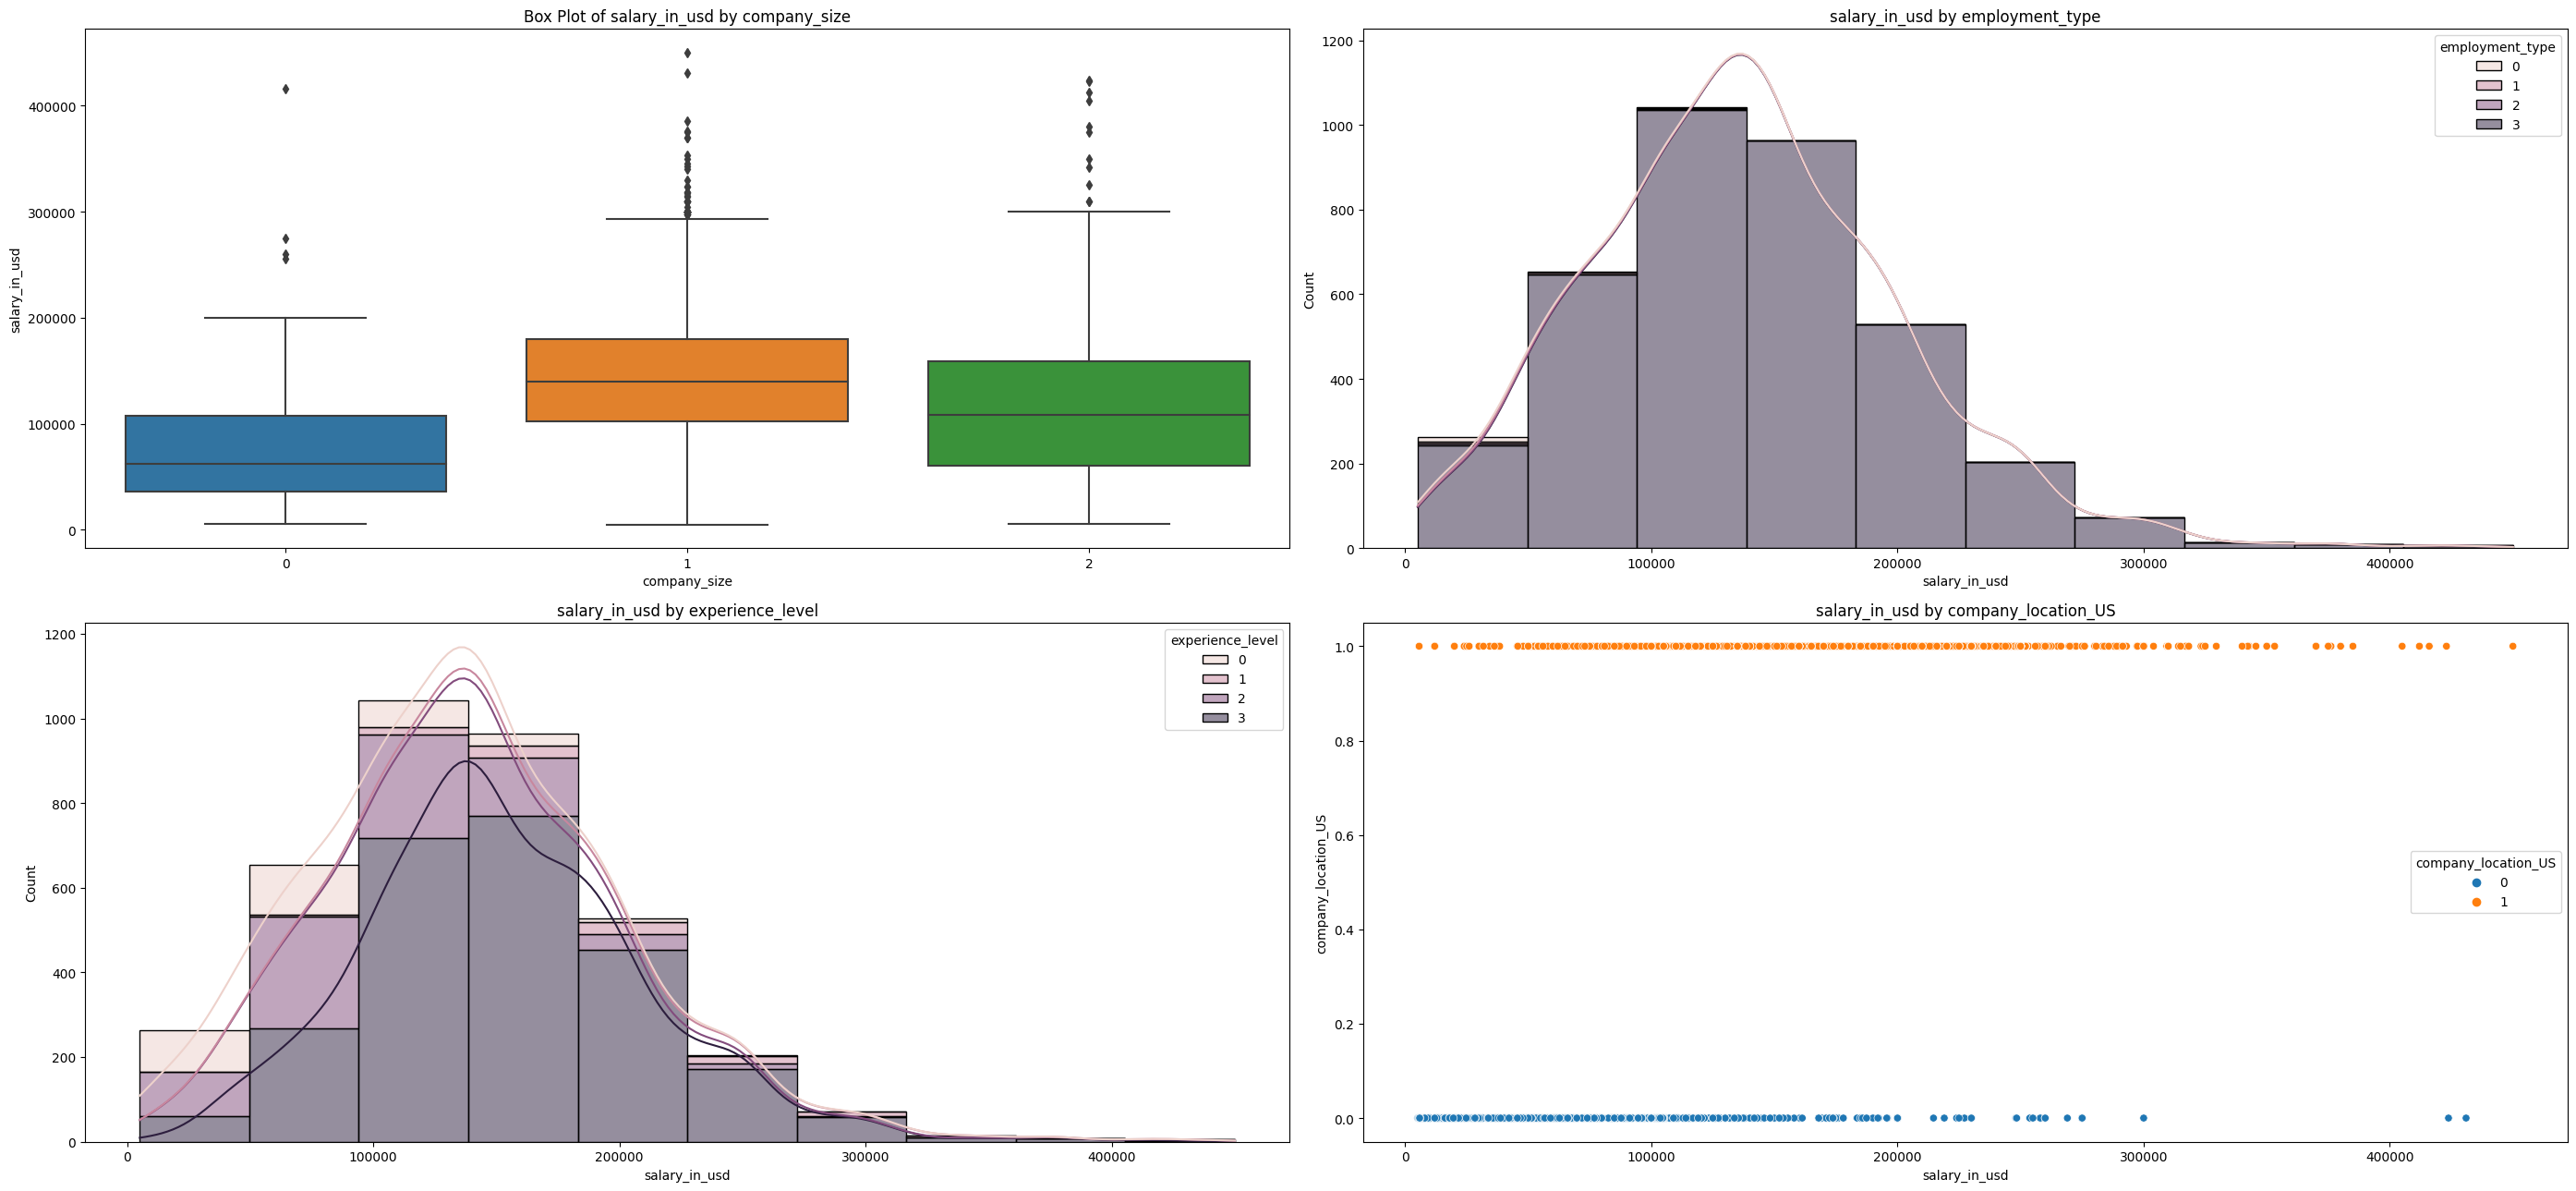

In [235]:
#numeric_list = ['work_year', 'salary', 'remote_ratio', 'salary_in_usd']
#non numeric = ['company_size', 'experience_level', 'employment_type', "job_title","salary_currency","employee_residence","company_location"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(28, 13))


sns.boxplot(data=dsSVM, x='company_size', y='salary_in_usd', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of salary_in_usd by company_size")

sns.histplot(data = dsSVM, x='salary_in_usd',  hue='experience_level',multiple='stack', bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("salary_in_usd by experience_level")

# sns.pointplot(data=data_set, x='work_year', y='salary', ci='sd', capsize=0.2, ax=axes[0, 1])
# axes[0, 1].set_title("duration by class")


sns.histplot(data = dsSVM, x='salary_in_usd',  hue='employment_type',multiple='stack', bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("salary_in_usd by employment_type")

# sns.boxplot(data=data_set, x='employment_type', y='experience_level', ax=axes[1, 1])
# axes[1, 1].set_title("Box Plot of credit_amount by existing_credits")

sns.scatterplot(data = dsSVM, x='salary_in_usd', y='company_location_US', hue='company_location_US', ax=axes[1, 1])
axes[1, 1].set_title("salary_in_usd by company_location_US")



# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### 2.2 Visuliaze tree data

In [236]:
numeric_list = ['work_year', 'salary', 'remote_ratio', 'salary_in_usd']
columns_list_after_change = ds.drop(columns = numeric_list)
print(columns_list_after_change.columns)

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


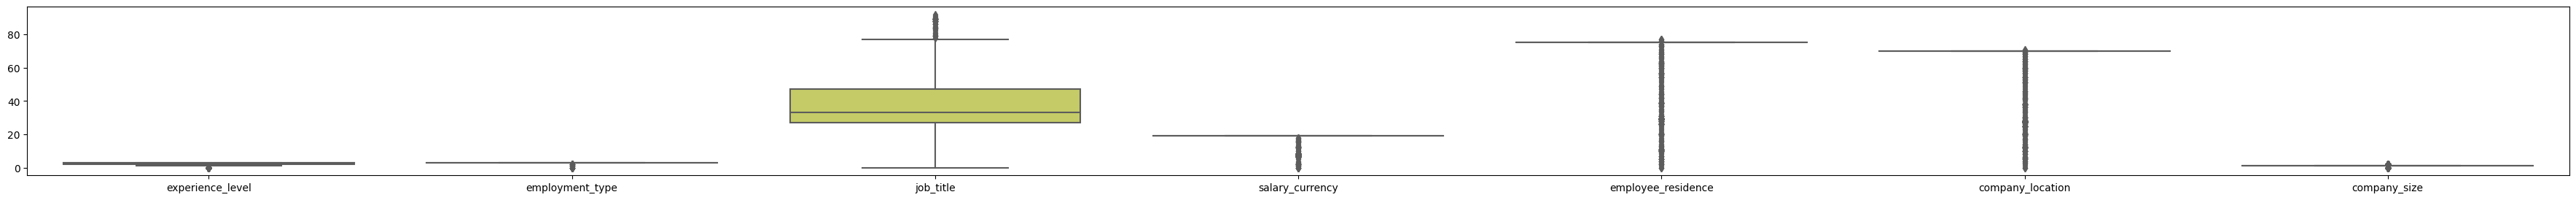

In [237]:
current_plaette = sns.color_palette("hls", 12)#color
# column_to_drop = 'ID'
# df_withoutid = ds.drop(column_to_drop, axis = 1)
plt.figure(figsize=(45, 3))

#df_without_id = df_withoutid[['Segmentation', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']].copy()
sns.boxplot(data = columns_list_after_change, palette = current_plaette)#plot boxplot

plt.show()

Class Counts:
experience_level
3    2516
2     805
0     320
1     114
Name: count, dtype: int64

Class Proportions:
experience_level
3    0.670040
2    0.214381
0    0.085220
1    0.030360
Name: count, dtype: float64


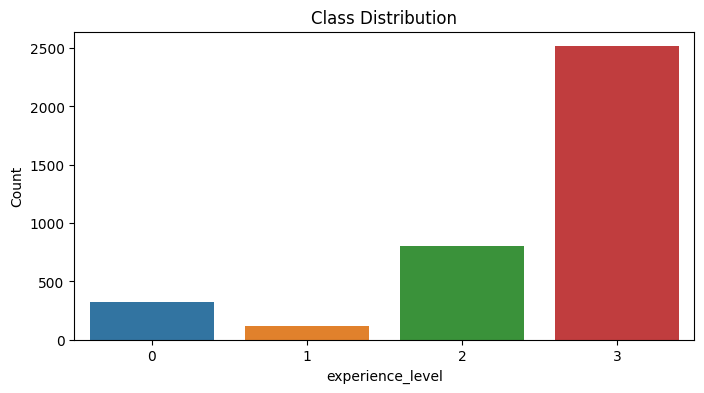

Class Counts:
employment_type
3    3718
0      17
2      10
1      10
Name: count, dtype: int64

Class Proportions:
employment_type
3    0.990146
0    0.004527
2    0.002663
1    0.002663
Name: count, dtype: float64


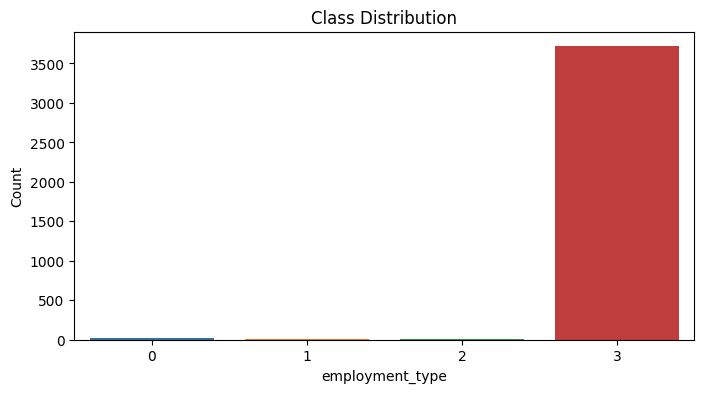

Class Counts:
job_title
33    1040
47     840
25     612
69     289
4      103
      ... 
85       1
10       1
76       1
78       1
56       1
Name: count, Length: 93, dtype: int64

Class Proportions:
job_title
33    0.276964
47    0.223702
25    0.162983
69    0.076964
4     0.027430
        ...   
85    0.000266
10    0.000266
76    0.000266
78    0.000266
56    0.000266
Name: count, Length: 93, dtype: float64


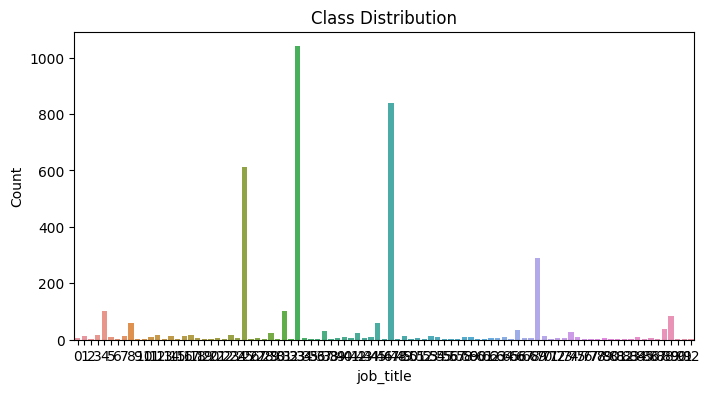

Class Counts:
salary_currency
19    3224
7      236
8      161
12      60
2       25
0        9
16       6
1        6
15       5
3        4
10       3
6        3
13       3
18       3
17       2
11       1
9        1
5        1
14       1
4        1
Name: count, dtype: int64

Class Proportions:
salary_currency
19    0.858589
7     0.062850
8     0.042876
12    0.015979
2     0.006658
0     0.002397
16    0.001598
1     0.001598
15    0.001332
3     0.001065
10    0.000799
6     0.000799
13    0.000799
18    0.000799
17    0.000533
11    0.000266
9     0.000266
5     0.000266
14    0.000266
4     0.000266
Name: count, dtype: float64


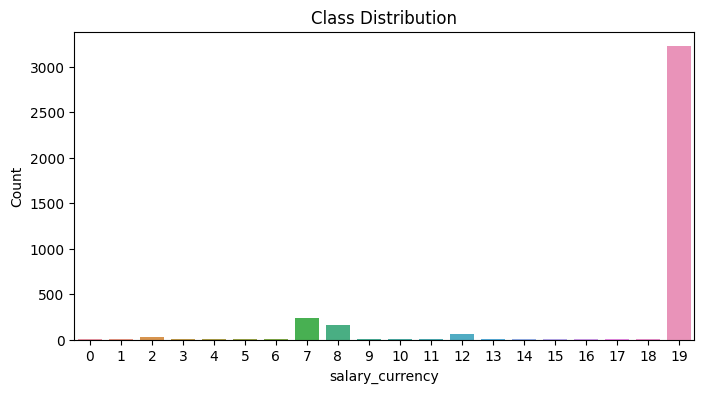

Class Counts:
employee_residence
75    3004
29     167
11      85
26      80
39      71
      ... 
6        1
1        1
18       1
46       1
53       1
Name: count, Length: 78, dtype: int64

Class Proportions:
employee_residence
75    0.800000
29    0.044474
11    0.022636
26    0.021305
39    0.018908
        ...   
6     0.000266
1     0.000266
18    0.000266
46    0.000266
53    0.000266
Name: count, Length: 78, dtype: float64


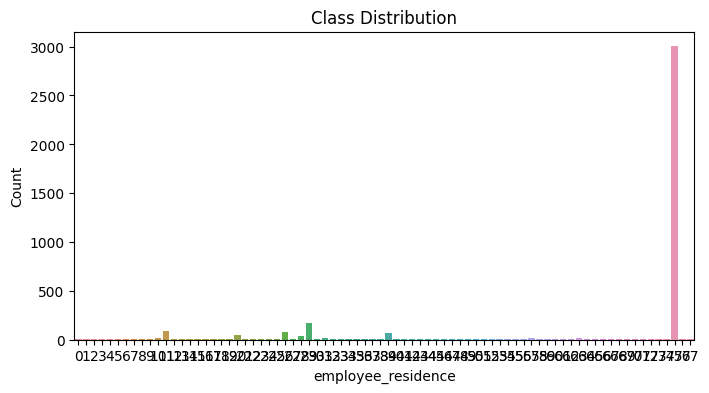

Class Counts:
company_location
70    3040
28     172
12      87
25      77
38      58
      ... 
49       1
11       1
40       1
18       1
50       1
Name: count, Length: 72, dtype: int64

Class Proportions:
company_location
70    0.809587
28    0.045806
12    0.023169
25    0.020506
38    0.015446
        ...   
49    0.000266
11    0.000266
40    0.000266
18    0.000266
50    0.000266
Name: count, Length: 72, dtype: float64


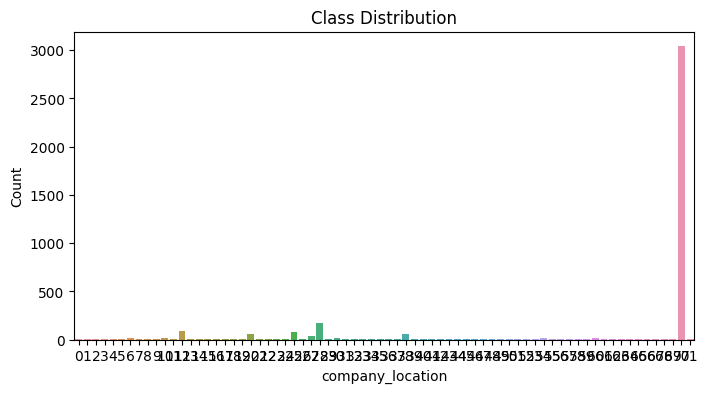

Class Counts:
company_size
1    3153
2     454
0     148
Name: count, dtype: int64

Class Proportions:
company_size
1    0.839680
2    0.120905
0    0.039414
Name: count, dtype: float64


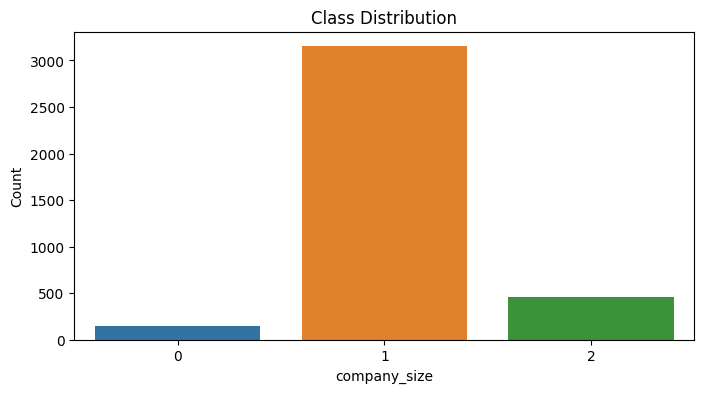

In [238]:
for col_namne in columns_list_after_change:
    class_counts = ds[col_namne].value_counts()

# calculate the proportion
    class_proportions = class_counts / class_counts.sum()

# print distribution
    print("Class Counts:")
    print(class_counts)
    print("\nClass Proportions:")
    print(class_proportions)

# draw the distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(data=ds, x=col_namne)
    plt.title("Class Distribution")
    plt.xlabel(f"{col_namne}")
    plt.ylabel("Count")
    plt.show()

In [239]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int8 
 2   employment_type     3755 non-null   int8 
 3   job_title           3755 non-null   int32
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int32
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int32
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int32
 10  company_size        3755 non-null   int8 
dtypes: int32(4), int64(4), int8(3)
memory usage: 187.1 KB


# 3.Clean Data

### 3.1 missing data 

#### 3.1.1 dsSVM -There is no missing data

In [240]:
dsSVM.isnull().sum()

work_year              0
experience_level       0
employment_type        0
salary                 0
salary_in_usd          0
                      ..
company_location_TH    0
company_location_TR    0
company_location_UA    0
company_location_US    0
company_location_VN    0
Length: 270, dtype: int64

#### 3.1.2 treedata - There is no missing data

In [241]:
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### 3.2 Normalization (for visualize how to achieve normalization only)

#### 3.2.1 dsSVM data

In [242]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
datasource_normalized = dsSVM.copy()

# Normalize the numeric columns
datasource_normalized[['salary_in_usd']] = scaler.fit_transform(datasource_normalized[['salary_in_usd']])

#### 3.2.1.1 compare before vs after normalization

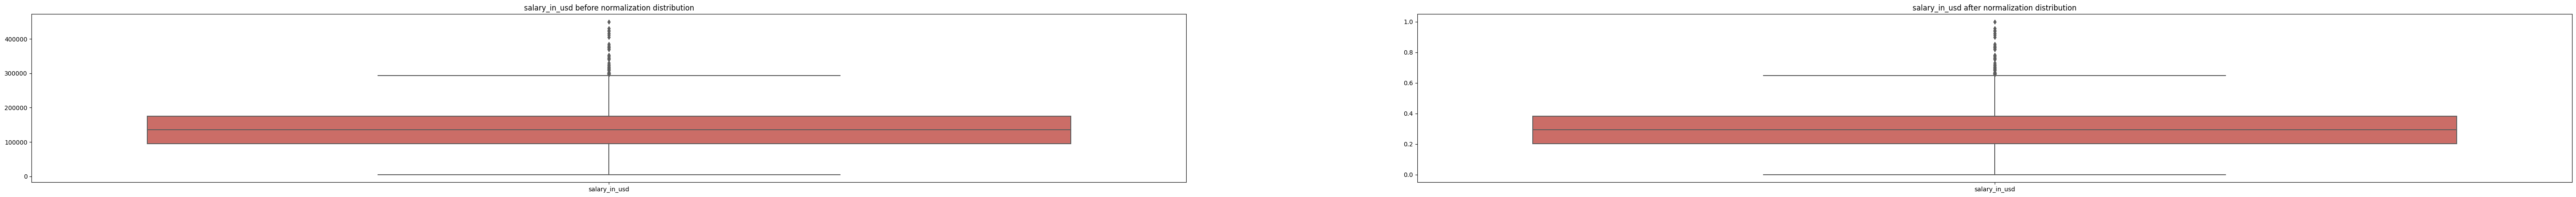

In [243]:
fig, ax = plt.subplots(1, 2, figsize = (75, 5))
current_plaette = sns.color_palette("hls", 12)#color
to_show = ['salary_in_usd']

sns.boxplot(data = data_set[to_show], palette = current_plaette, ax=ax[0]).set_title("salary_in_usd before normalization distribution")
sns.boxplot(data = datasource_normalized[to_show], palette = current_plaette, ax=ax[1]).set_title("salary_in_usd after normalization distribution")

# before removing outlier

plt.show()

In [244]:
dsSVM.shape

(3755, 270)

### 3.3 Outlier

#### 3.3.1 outlier function for future re-use

In [245]:
def IQR_Outliers (X, features):

    print('# of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    #print(indices)
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        print('Outliers Index: ', outliers_index)
        print('Outliers: ', outliers)
        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    print('List of rows with outliers: ', out_indexlist)
    
    return out_indexlist

In [246]:
outlier_indices = IQR_Outliers(ds, ['salary_in_usd'])
ds = ds.drop(outlier_indices)

# of features:  1
Features:  ['salary_in_usd']
Number of samples:  3755

Feature:  salary_in_usd
Upper and Lower limits:  295000.0 -25000.0
Number of outliers:  63
Outliers Index:  [33, 68, 83, 133, 145, 163, 190, 228, 358, 478, 482, 488, 528, 649, 687, 716, 793, 845, 860, 1007, 1097, 1099, 1105, 1116, 1131, 1153, 1258, 1286, 1288, 1311, 1396, 1421, 1427, 1458, 1558, 1593, 1605, 1675, 1677, 1722, 1932, 2011, 2162, 2279, 2281, 2331, 2359, 2374, 2406, 2502, 2555, 2670, 2832, 2856, 3152, 3410, 3463, 3468, 3522, 3675, 3697, 3747, 3750]
Outliers:  [342810 309400 300000 342300 318300 309400 300000 329500 304000 353200
 297300 317070 423834 376080 299500 297300 299500 340000 310000 310000
 300240 300240 370000 323300 299500 310000 375000 318300 385000 370000
 314100 350000 310000 300000 299500 300000 300000 297300 297300 310000
 310000 430967 300000 310000 299500 300000 375000 350000 315000 300000
 345600 300000 297500 300000 300000 324000 405000 380000 450000 416000
 325000 423000 412000]

N

### 3.4 remove attribute that highly correlated

#### 3.4.1 remove salary_currenct and salary for tree data

In [247]:
column_to_drop = ['salary_currency','salary']
df_clean_ds = ds.drop(column_to_drop, axis = 1)
df_clean_ds.shape

(3692, 9)

# 4.Identify Correlated Variables

### 4.1 correlation matrix visualization

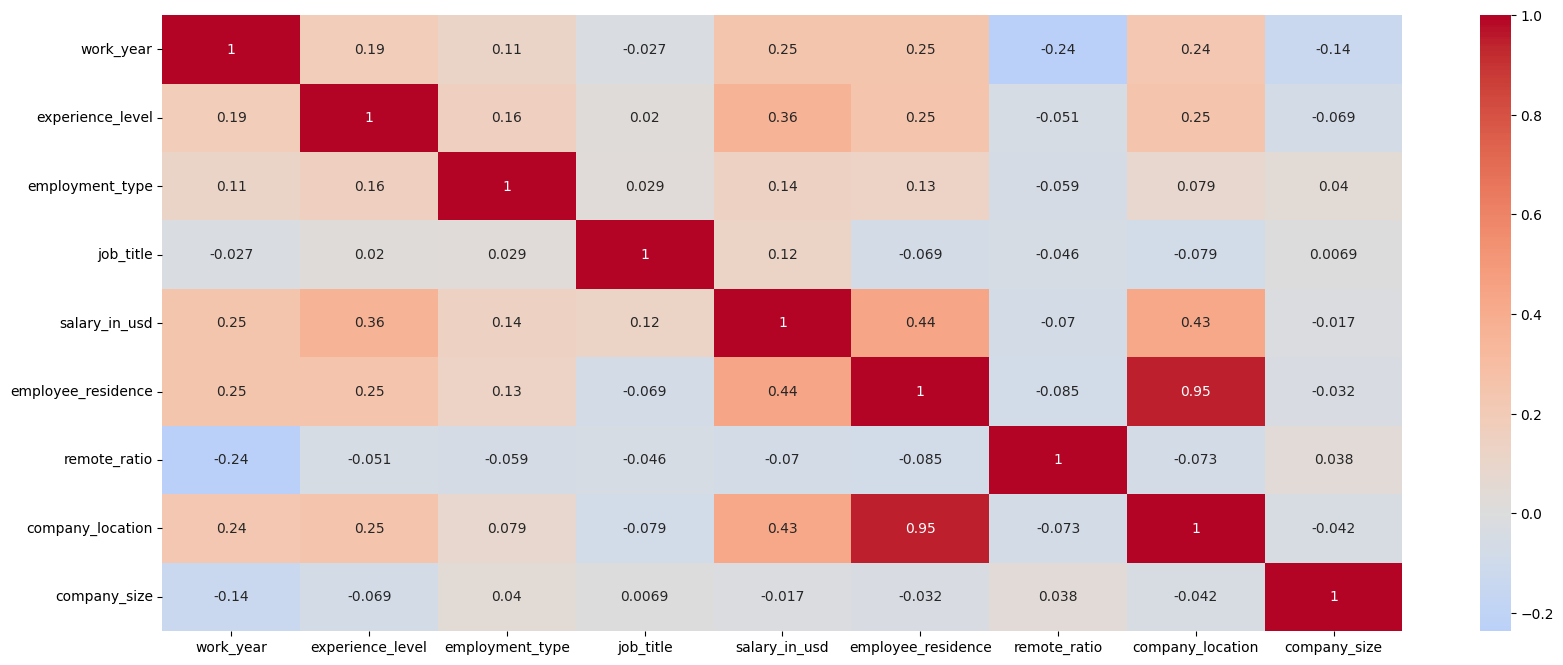

In [248]:
plt.figure(figsize=(20,8))
sns.heatmap(df_clean_ds.corr(),annot=True, cmap='coolwarm', center = 0)
plt.show()

### 4.1.1 Remove highly correlated attribute

In [249]:
df = df_clean_ds.drop(['employee_residence'], axis=1)

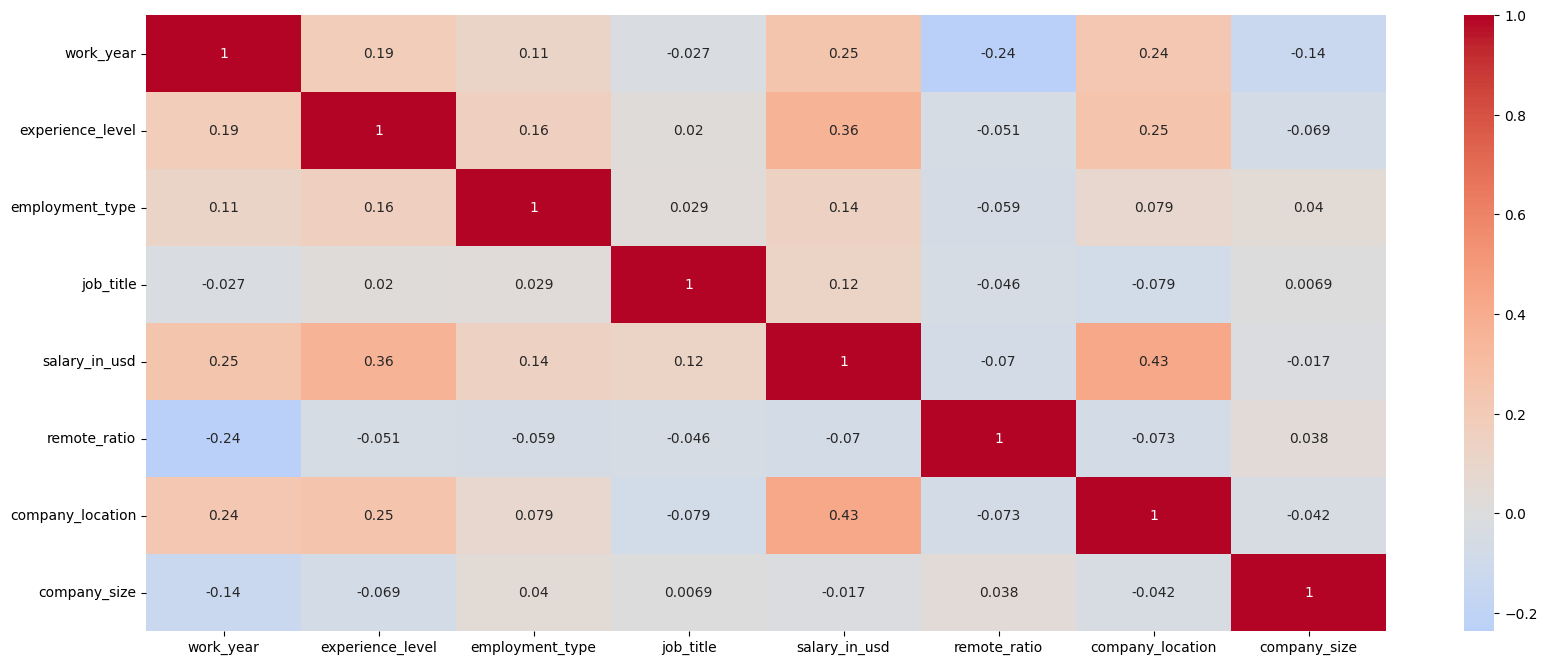

In [250]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', center = 0)
plt.show()

#### 4.1.2 normalize after_remove_correlated_ds

In [251]:
target = df.loc[:, 'salary_in_usd']
df = df.drop(['salary_in_usd'], axis=1)
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df = pd.concat([normalized_df, target],axis=1)

# 5.Summary

In [252]:
normalized_df.to_csv('./data/data_salaries_normalized_df_kk.csv', index=False)

The dataset I have chosen is data_salaries.csv. The data is provided by MSA and we are using python to do the data analyst process. The data has 11 attributes and the target attribute is salary_in_usd (continuous value). 
To visualize the numeric variables we could see that salary_in_usd and salary have more variance range as the standard deviation is large. Which means the thses attributes are widely ranged. 

I propose to use ordinal encoder and label encoder to do the converting datatype. As some of the attributes have explicit relationships, such as company_size, the range is from Small to Medium to Large.

The reason for choosing label encoder as it does not introduce more attributes (dimensions), although one-hot encoder may work well when represent categorical data without introducing relationships, but curse of dimensionality will limit the time and the result is hard to visualize. If we use algorithms like SVM, we may consider to use one-hot encoder as such algorithm is sensitive to implicit relationships. But for tree algorithms, it will treat the values like label. Hence, I propose to use label encoder and ordinal encoder to convert the data type.

Then we comes to the part of data cleaning. There is no missing values.

Other than that. There are some outliers as there is no perfect data. But I propose to remove the outliers at the current stage because regression algorithms can handle errors but may skew the distribution. 

I have done normalization as there are various fields of features. And some features are range from 0-1 and some features are range from 0-100000. In this case, wider range attributes may dominate the result. To prevent the domination, normalization could make the features all into the same scale while maintain the distribution. 

Then I have done feature selection to filter out the potential unimportant features(‘salary’) and (‘salary_currency’). The target could be converted by knowing salary and salary_currency. They are like leg length of people(salary) and height of people(target) which are strongly correlated by (salary_currency). One can represent another, in this case, if we keep those attributes, then the model will highly consider these attributes.		 	 	 				
				

Then I have proposed to use correlation matrix to show whether to remove any high correlated attributes. We then remove employee_of_residence
